In [1]:
import pandas as pd
sales_data = pd.read_csv('sales_data.csv')
orders1 = pd.read_csv('orders1.csv')
inventory = pd.read_csv('inventory.csv')


# Task 1.
### Calculate monthly revenue growth, average order value, and customer retention rate.


In [2]:
# Calculate Monthly Revenue Growth
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data['year_month'] = sales_data['order_date'].dt.to_period('M')
monthly_revenue = sales_data.groupby('year_month')['revenue'].sum()
monthly_revenue_growth = monthly_revenue.pct_change() * 100
monthly_revenue_growth

year_month
2023-01          NaN
2023-02     7.000535
2023-03    -5.412736
2023-04    -0.704283
2023-05     0.948237
2023-06    -2.257472
2023-07    12.656059
2023-08   -14.650309
2023-09    10.725093
2023-10     6.714900
2023-11   -11.172748
2023-12     1.513137
Freq: M, Name: revenue, dtype: float64

In [3]:
# Calculate Average Order Value
total_revenue = sales_data['revenue'].sum()
total_orders = sales_data['order_id'].nunique()
average_order_value = total_revenue / total_orders
average_order_value

252.57207720302995

In [4]:
# Calculate Customer Retention Rate
customer_orders = orders1.groupby('customer_id')['order_id'].nunique()
retained_customers = customer_orders[customer_orders > 1]
retention_rate = len(retained_customers) / len(customer_orders) * 100
retention_rate

96.6900702106319

# Task 2.
### Analyze inventory levels to find products frequently out of stock.


In [5]:
#  Analyze Inventory Levels & Out-of-Stock Patterns
out_of_stock_products = inventory[inventory['out_of_stock'] == 'Yes']
frequent_out_of_stock = out_of_stock_products['product_name'].value_counts()
frequent_out_of_stock

product_name
Milk          11
Chicken        8
Fruits         7
Vegetables     6
Eggs           6
Bread          6
Rice           4
Name: count, dtype: int64

# Task 3.
### Create a dashboard displaying revenue trends, product demand, and stock levels.


In [6]:
print(monthly_revenue.head())  # Check first few values
print(monthly_revenue.dtypes)  # Check data types
print(monthly_revenue.index)   # Check index type


year_month
2023-01    102152.914293
2023-02    109304.165004
2023-03    103387.819191
2023-04    102659.676082
2023-05    103633.133311
Freq: M, Name: revenue, dtype: float64
float64
PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]', name='year_month')


In [7]:
monthly_revenue = monthly_revenue.astype(float, errors='raise')  # Will raise error if conversion fails

In [8]:
monthly_revenue.index = monthly_revenue.index.astype(str)


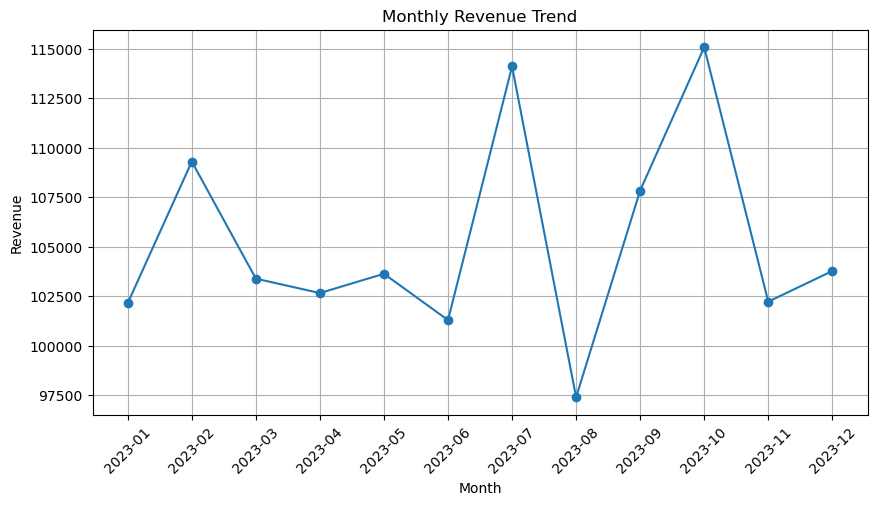

In [9]:
# monthly revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()


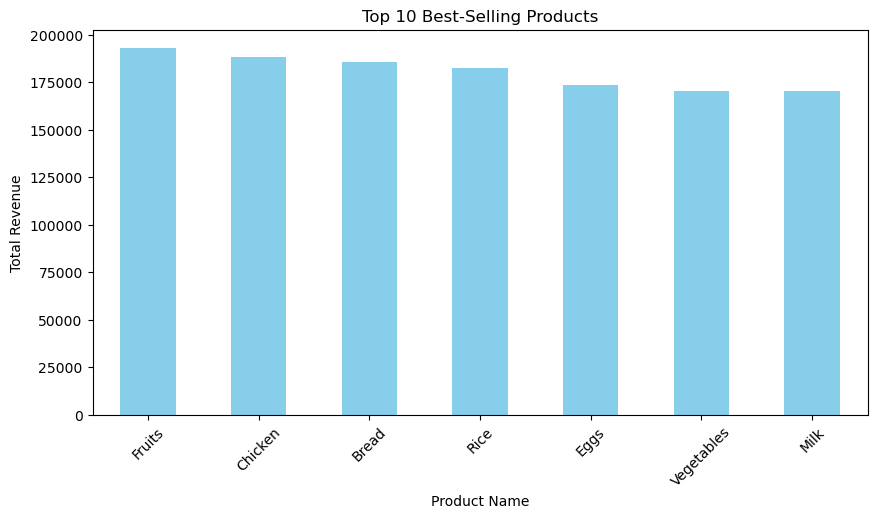

In [10]:
# product demand analysis
top_products = sales_data.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


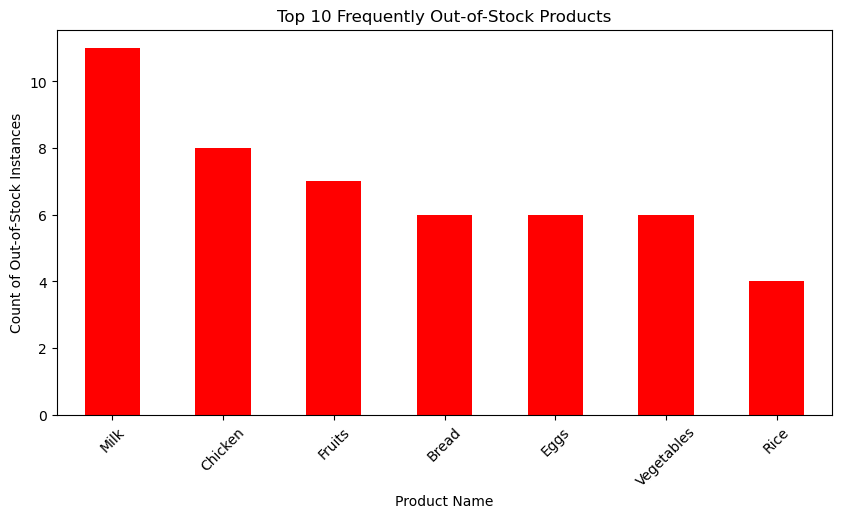

In [11]:
# stock level and out of stock analysis
out_of_stock_counts = inventory[inventory["out_of_stock"] == "Yes"].groupby("product_name").size().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
out_of_stock_counts.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Frequently Out-of-Stock Products")
plt.xlabel("Product Name")
plt.ylabel("Count of Out-of-Stock Instances")
plt.xticks(rotation=45)
plt.show()


In [13]:
# pip install xlsxwriter


   ---------------------------------------- 0.0/165.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/165.1 kB ? eta -:--:--
   ------- ------------------------------- 30.7/165.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  163.8/165.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 165.1/165.1 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# Create an Excel writer
with pd.ExcelWriter("inventory_results.xlsx", engine="xlsxwriter") as writer:
    # Save out-of-stock counts
    out_of_stock_counts.to_frame(name="Count").to_excel(writer, sheet_name="OutOfStockCounts")
    
    # Save monthly revenue
    monthly_revenue.to_excel(writer, sheet_name="MonthlyRevenue")

    # Save the original dataset (optional)
    inventory.to_excel(writer, sheet_name="OriginalData", index=False)

print("Results saved to inventory_results.xlsx successfully!")


Results saved to inventory_results.xlsx successfully!


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming out_of_stock_counts and monthly_revenue data are ready

# Step 1: Plot the chart
plt.figure(figsize=(10, 5))
out_of_stock_counts.head(10).plot(kind='bar', color='red')
plt.title("Top 10 Frequently Out-of-Stock Products")
plt.xlabel("Product Name")
plt.ylabel("Out-of-Stock Count")
plt.tight_layout()

# Step 2: Save the plot as a PNG image (so we can insert it into Excel later)
plt.savefig("out_of_stock_plot.png", format="png")
plt.close()  # Close the plot to avoid displaying it

# Step 3: Save the results to an Excel file using xlsxwriter
with pd.ExcelWriter("inventory_results.xlsx", engine="xlsxwriter") as writer:
    # Save out-of-stock counts data
    out_of_stock_counts.to_frame(name="Count").to_excel(writer, sheet_name="OutOfStockCounts")
    
    # Save monthly revenue data (if available)
    if 'monthly_revenue' in locals():
        monthly_revenue.to_excel(writer, sheet_name="MonthlyRevenue")
    
    # Access the workbook and add the image
    workbook  = writer.book
    worksheet = workbook.add_worksheet('Images')
    worksheet.insert_image('A1', 'out_of_stock_plot.png')

print("Results saved to inventory_results.xlsx successfully!")


Results saved to inventory_results.xlsx successfully!
